### This notebook builds a regression model using neural network back propagation

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#### Load the data

In [2]:
aqdf = pd.read_csv("../AirQualityUCI.csv", sep=";", decimal=",", header=0)


FileNotFoundError: File b'AirQualityUCI.csv' does not exist

In [ ]:
aqdf.head()

In [ ]:
# remove first and last 2 cols 
del aqdf["Date"]
del aqdf["Time"]
del aqdf["Unnamed: 15"]
del aqdf["Unnamed: 16"]

In [ ]:
# fill NaNs in each column with the mean value
aqdf = aqdf.fillna(aqdf.mean())

In [ ]:
aqdf.head()

In [ ]:
Xorig = aqdf.as_matrix()

In [7]:

scaler = StandardScaler()
Xscaled = scaler.fit_transform(Xorig)
# store these off for predictions with unseen data
Xmeans = scaler.mean_
Xstds = scaler.scale_

Y = Xscaled[:, 3]
X = np.delete(Xscaled, 3, axis=1)


In [8]:
X

array([[ 4.76878619e-01,  9.48709735e-01,  2.22466494e+00, ...,
         8.89997253e-02,  1.84947610e-01,  1.96064487e-01],
       [ 4.69105014e-01,  7.41281438e-01,  1.95116129e+00, ...,
         8.20133180e-02,  1.61373942e-01,  1.95230708e-01],
       [ 4.71696215e-01,  1.07682721e+00,  1.77842215e+00, ...,
         4.94100842e-02,  2.85135701e-01,  1.95868303e-01],
       ...,
       [-2.76173948e-16,  0.00000000e+00,  0.00000000e+00, ...,
         1.69608148e-15, -2.09376236e-15, -2.29270561e-17],
       [-2.76173948e-16,  0.00000000e+00,  0.00000000e+00, ...,
         1.69608148e-15, -2.09376236e-15, -2.29270561e-17],
       [-2.76173948e-16,  0.00000000e+00,  0.00000000e+00, ...,
         1.69608148e-15, -2.09376236e-15, -2.29270561e-17]])

In [9]:
Y

array([ 2.43976477e-01,  1.83190953e-01,  1.73465269e-01, ...,
       -8.09825865e-17, -8.09825865e-17, -8.09825865e-17])

In [10]:
train_size = int(0.7 * X.shape[0])
Xtrain, Xtest, Ytrain, Ytest = X[0:train_size], X[train_size:], Y[0:train_size], Y[train_size:]

In [11]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

In [12]:
def relu(x):
    return np.maximum(x, 0)

In [ ]:
def derv_relu(x):
    return np.greater(x, 0).astype(int)

In [35]:
n_hidden =20
epochs = 50
learning_rate = 0.1

n_records, n_features = Xtrain.shape


#### Initialize weights

In [36]:
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))

weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

weights_hidden_output = weights_hidden_output[:,None]

In [37]:
last_loss = None
for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(Xtrain,Ytrain):
        #print(x,y)
        hidden_input = np.dot(x[None,:],weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output = np.dot(hidden_output, weights_hidden_output)
        
        error = y - output
        
        output_error_term = error * 1 # derivative of y=x is 1
        
        hidden_error =  weights_hidden_output.T *output_error_term 
        
        hidden_error_term = hidden_error * hidden_output * (1-hidden_output)
        
        del_w_hidden_output += learning_rate*np.dot(hidden_output.T, output_error_term)
        del_w_input_hidden +=  learning_rate*np.dot(x[:,None], hidden_error_term)
        
    # TODO: Update weights
    weights_input_hidden += del_w_input_hidden / n_records
    weights_hidden_output += del_w_hidden_output / n_records
        
    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = np.dot(hidden_output, weights_hidden_output)
        loss = np.mean((out - Y) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss     
        

Train loss:  1.2417444974273484
Train loss:  1.0023234411524518
Train loss:  1.0005539141128434
Train loss:  1.0001668626298077
Train loss:  1.0000018068591887
Train loss:  1.0001201790332328   WARNING - Loss Increasing
Train loss:  1.000557321245895   WARNING - Loss Increasing
Train loss:  1.001316321154876   WARNING - Loss Increasing
Train loss:  1.0023724971285295   WARNING - Loss Increasing
Train loss:  1.0036791529557727   WARNING - Loss Increasing


In [38]:
hidden = sigmoid(np.dot(Xtest, weights_input_hidden))
out = np.dot(hidden, weights_hidden_output)



__Predicting with test data__

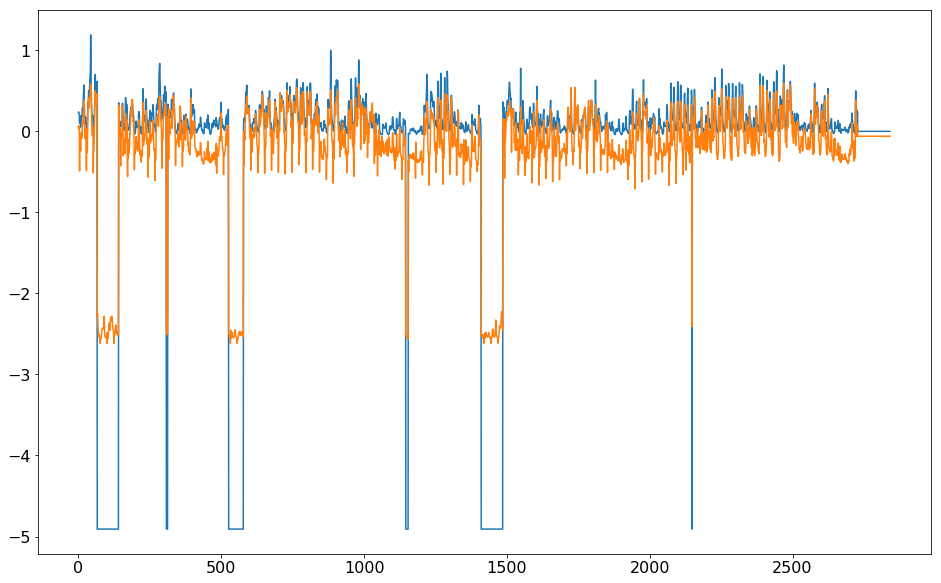

In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0,10.0)
matplotlib.rcParams['font.size']=16

plt.plot(Ytest)
plt.plot(out)
plt.show()